# Exploration

In [2]:
import sys
sys.path.append('../')

import torch
import numpy as np
from sklearn.linear_model import LinearRegression

import structures
from settings import settings

import os

import matplotlib.pyplot as plt

In [3]:
oai_sae_path = settings["oai_autoencoder_dir"] + "gpt2-small/resid_post_mlp_v5_32k/"
cache_dir = settings["feature_dir"] + "raw_features/"

layers = range(0, 7, 2)
date = '071824'

activations = [ torch.load(cache_dir + 'layer' + str(i) + '_activations_' + date + '.pt') for i in layers ]
locations = [ torch.load(cache_dir + 'layer' + str(i) + '_locations_' + date + '.pt') for i in layers ]

feature_count = 1000 # only stored first 1000

In [4]:
print(activations[0].shape)
print(locations[0].shape)

n_examples = len(activations)

torch.Size([10966916])
torch.Size([10966916, 3])


In [5]:
activations = [ activations[i].numpy() for i in range(len(layers)) ]
batch_numbers = [ locations[i][:, 0].numpy() for i in range(len(layers)) ] # sentence index
token_ids = [ locations[i][:, 1].numpy() for i in range(len(layers)) ] # position index
feature_ids = [ locations[i][:, 2].numpy() for i in range(len(layers)) ] # feature index

In [6]:
len(activations[0])

10966916

In [7]:
print(len(locations[0][:,0].unique()))
print(len(locations[0][:,1].unique()))
print(len(locations[0][:,2].unique()))

156224
64
992


In [8]:
len(locations[0][:,0].unique()) * len(locations[0][:,1].unique()) * 64

639893504

In [9]:
locations[0]

tensor([[     0,      0,    496],
        [     0,      1,    674],
        [     0,      1,    719],
        ...,
        [156223,     62,    674],
        [156223,     63,    674],
        [156223,     63,    697]])

In [10]:
batch_numbers[0][:200]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [11]:
token_ids[0][:200]

array([ 0,  1,  1,  1,  2,  3,  3,  4,  5,  5,  5,  7,  7,  7, 12, 13, 15,
       15, 15, 16, 17, 19, 20, 22, 22, 23, 23, 24, 24, 26, 26, 26, 29, 32,
       35, 35, 36, 36, 37, 39, 41, 44, 44, 44, 45, 46, 46, 47, 47, 51, 53,
       57, 57, 58, 59, 60, 61, 61, 62, 63,  0,  1,  2,  6,  7, 10, 13, 14,
       15, 16, 16, 16, 17, 18, 20, 20, 20, 20, 21, 21, 22, 23, 24, 25, 25,
       26, 27, 28, 29, 30, 30, 32, 34, 34, 35, 38, 40, 41, 42, 43, 43, 43,
       44, 45, 45, 46, 47, 47, 49, 49, 50, 50, 50, 50, 51, 51, 51, 51, 52,
       52, 53, 54, 54, 54, 54, 55, 56, 57, 58, 59, 60, 60, 60, 61, 61, 62,
       62, 63, 63,  0,  1,  1,  2,  2,  2,  2,  3,  6,  9,  9, 10, 10, 11,
       12, 13, 13, 13, 14, 16, 17, 19, 21, 21, 23, 23, 28, 28, 29, 30, 32,
       33, 33, 33, 34, 34, 34, 35, 36, 36, 39, 39, 41, 42, 42, 42, 44, 44,
       45, 46, 46, 47, 49, 50, 51, 52, 52, 52, 55, 55, 58])

## Exploration of Activations and Locations

### Plot of Examples per Feature

In [12]:
x = np.array([ range(feature_count) for _ in range(len(layers)) ]) # indices of the features
# TODO: this is badly coded bc all the xs are duplicates of each other. in the future, no need for this variable x.
y = np.array([ [ 0 ] * feature_count for _ in range(len(layers)) ]) # start counts at 0

for i in range(len(layers)):
    for id in feature_ids[i]:
        y[i][id] += 1 # add one to count if example corresponds to that feature id

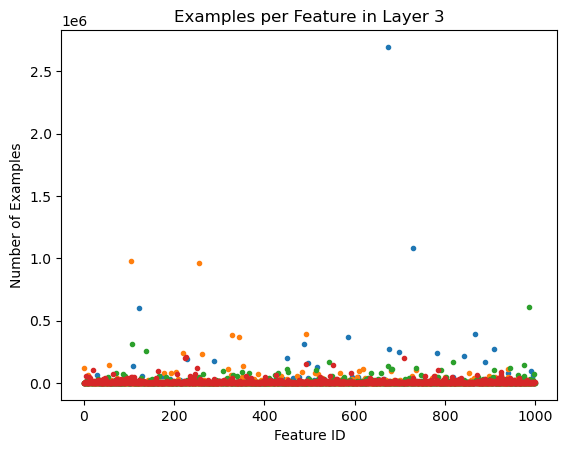

In [13]:
for i in range(len(layers)):
    plt.scatter(x[i], y[i], marker='.')
    plt.xlabel('Feature ID')
    plt.ylabel('Number of Examples')
    plt.title('Examples per Feature in Layer ' + str(i))

In [14]:
sorted_indices = [ list(range(feature_count)) for _ in range(len(layers)) ]
sorted_indices_inv = [ list(range(feature_count)) for _ in range(len(layers)) ]
for i in range(len(layers)):
    sorted_indices[i].sort(key=lambda k : y[i][k])
for i in range(len(layers)):
    for j in range(feature_count):
        sorted_indices_inv[i][sorted_indices[i][j]] = j
sorted_indices[0]

[17,
 127,
 405,
 462,
 480,
 511,
 773,
 905,
 105,
 765,
 254,
 358,
 389,
 871,
 331,
 588,
 542,
 37,
 189,
 63,
 959,
 159,
 295,
 46,
 118,
 767,
 22,
 433,
 372,
 784,
 937,
 58,
 563,
 66,
 598,
 213,
 597,
 708,
 151,
 371,
 957,
 302,
 325,
 200,
 451,
 571,
 590,
 285,
 690,
 645,
 361,
 202,
 501,
 733,
 804,
 653,
 526,
 185,
 715,
 855,
 244,
 18,
 48,
 780,
 677,
 490,
 770,
 39,
 960,
 965,
 120,
 763,
 670,
 94,
 303,
 395,
 947,
 431,
 756,
 623,
 251,
 529,
 142,
 863,
 472,
 962,
 338,
 84,
 12,
 163,
 864,
 932,
 111,
 52,
 353,
 441,
 845,
 892,
 169,
 800,
 459,
 615,
 176,
 983,
 992,
 626,
 944,
 3,
 239,
 936,
 564,
 818,
 595,
 190,
 77,
 749,
 853,
 956,
 384,
 888,
 638,
 713,
 87,
 240,
 38,
 475,
 404,
 248,
 272,
 572,
 561,
 311,
 964,
 28,
 88,
 791,
 639,
 106,
 538,
 923,
 622,
 30,
 481,
 363,
 417,
 927,
 620,
 955,
 842,
 397,
 706,
 131,
 895,
 465,
 104,
 548,
 913,
 420,
 540,
 184,
 573,
 585,
 335,
 270,
 345,
 205,
 514,
 738,
 5,
 178,
 255

In [15]:
x[0][sorted_indices[i]]

array([516, 157, 848, 150, 218, 521, 713, 725, 932, 844, 823, 155, 666,
        47, 849,  39, 423, 375, 846, 284, 362, 602, 116, 194, 149, 257,
       228, 537, 837, 595, 649, 762,  80,  51, 519, 147, 253, 286, 242,
       879, 840, 178, 863, 532, 100, 897, 741, 934, 886, 650, 212, 404,
       350, 353, 601, 549, 346, 576, 487,   3,  25, 805, 536, 854, 995,
       670,  22, 527, 853,   7, 192, 646, 990, 294, 515, 304, 804, 876,
       994, 463, 631, 669, 276, 972, 711, 556, 427, 956, 204, 929, 900,
       593, 277,  87, 855, 893, 586, 966, 213, 582,  32, 154, 317, 906,
       140, 172, 611, 398, 555, 950, 654, 493, 708, 323, 564, 960, 343,
       847, 288, 526, 758, 134, 866, 293, 819, 843, 517, 574, 786, 388,
       281, 640, 405, 734, 979, 120, 461,  40, 610, 930, 196, 386, 146,
       469, 737, 946, 243, 497, 864,  73, 417, 217, 387, 794, 268, 766,
       133, 760, 169, 672, 366, 283, 655, 165, 978, 988, 502, 887, 961,
       626, 480, 606,  58, 291, 797, 349, 701, 877, 940, 125, 19

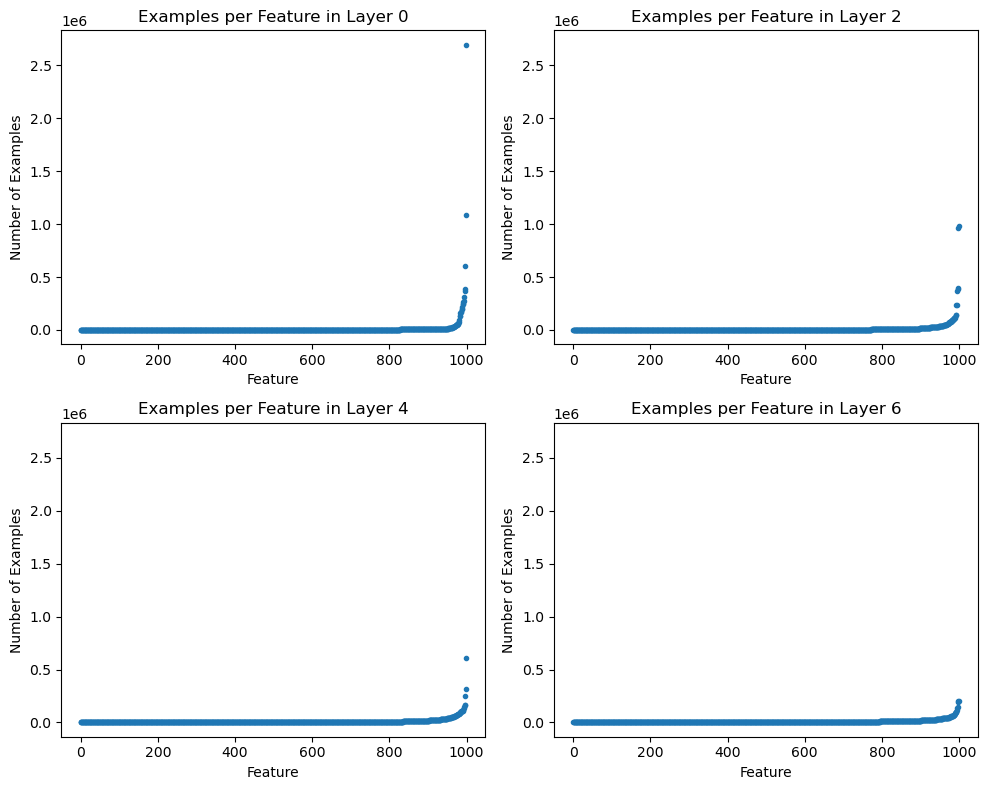

In [16]:
x_min = min(min(xi) for xi in x)
x_max = max(max(xi) for xi in x)
y_min = min(min(yi) for yi in y)
y_max = max(max(yi) for yi in y)

# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, len(layers)//2, figsize=(10, 8))  # 2x2 grid, adjust figsize as needed

# Flatten the array of axes for easy iteration
axs = axs.flatten()

for i in range(len(layers)):
    axs[i].scatter(x[i], y[i][sorted_indices[i]], marker='.')
    axs[i].set_xlabel('Feature')
    axs[i].set_ylabel('Number of Examples')
    axs[i].set_title('Examples per Feature in Layer ' + str(layers[i]))
    axs[i].set_xlim(x_min-50, x_max+50)  # Set x limits for all subplots
    axs[i].set_ylim(y_min-0.05*y_max, y_max+0.05*y_max)  # Set y limits for all subplots

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

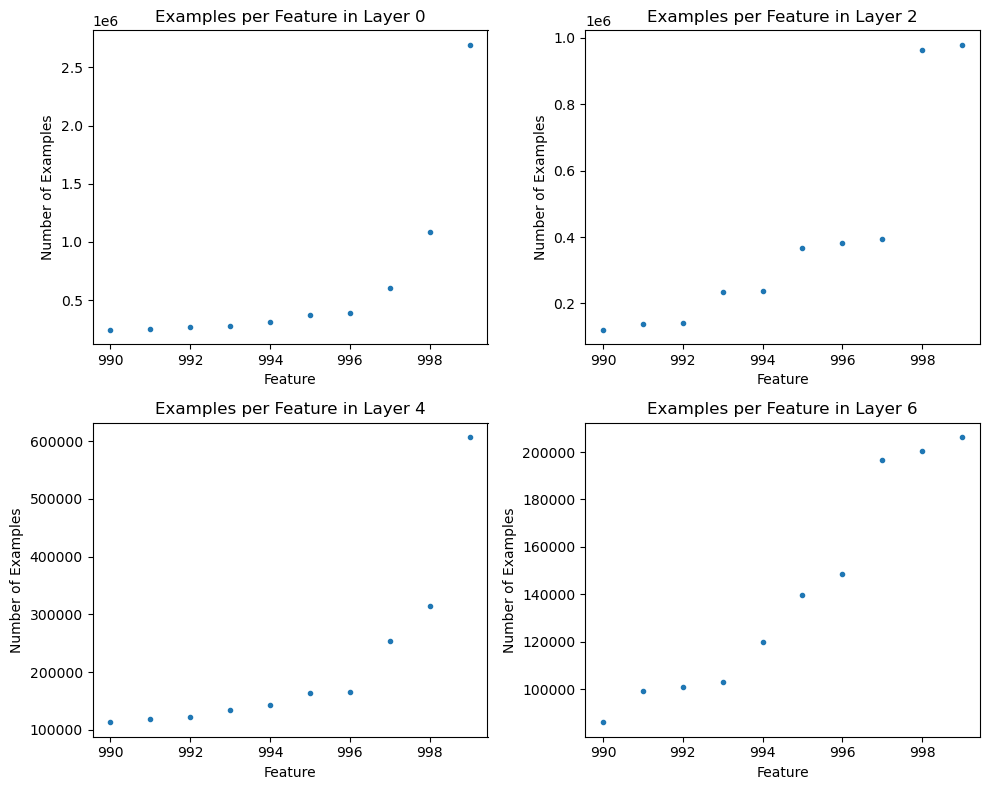

In [17]:
x_min = min(min(xi) for xi in x)
x_max = max(max(xi) for xi in x)
y_min = min(min(yi) for yi in y)
y_max = max(max(yi) for yi in y)

# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, len(layers)//2, figsize=(10, 8))  # 2x2 grid, adjust figsize as needed

# Flatten the array of axes for easy iteration
axs = axs.flatten()

for i in range(len(layers)):
    axs[i].scatter(x[i][990:], y[i][sorted_indices[i]][990:], marker='.')
    axs[i].set_xlabel('Feature')
    axs[i].set_ylabel('Number of Examples')
    axs[i].set_title('Examples per Feature in Layer ' + str(layers[i]))

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Text(0.5, 1.0, 'Sorted Examples per Feature')

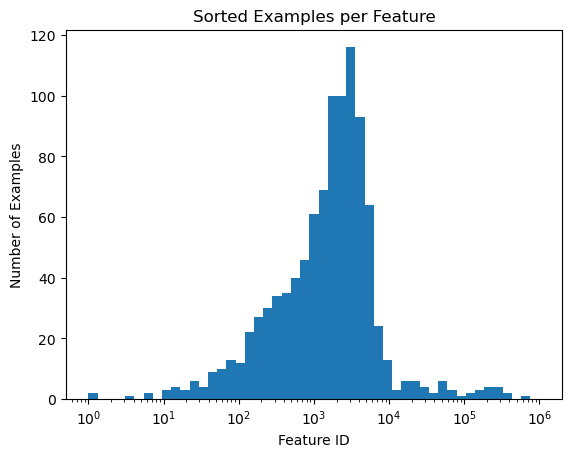

In [18]:
plt.hist(y[0],bins=np.logspace(0,6))
plt.xscale('log')
plt.xlabel('Feature ID')
plt.ylabel('Number of Examples')
plt.title('Sorted Examples per Feature')

#### Identifying similarly activating features

In [19]:
neighborhood_radius = 3

# check if sorted_feature(i) and sorted_feature(i+1) are closer than their neighborhood
def is_similar_compared_to_neighborhood(layer_id, i, FACTOR=0.2):
    neighborhood_indices = range(max(0, i-neighborhood_radius), min(feature_count, i+1+neighborhood_radius))
    
    model = LinearRegression()
    model.fit(np.array(x[layer_id][neighborhood_indices]).reshape(-1,1), 
              np.array(y[layer_id][sorted_indices[layer_id]][neighborhood_indices]))
    
    if (y[layer_id][sorted_indices[layer_id]][i+1]-y[layer_id][sorted_indices[layer_id]][i]) < FACTOR * model.coef_[0]:
        return True
    return False

def find_similar_features(layer_id):
    similarly_activated_features = structures.DisjointSet(feature_count)

    for i in range(feature_count-1):
        if is_similar_compared_to_neighborhood(layer_id, i):
            similarly_activated_features.union(sorted_indices_inv[layer_id][i], sorted_indices_inv[layer_id][i+1])

    return similarly_activated_features

res = [ find_similar_features(i) for i in range(len(layers)) ]
res

In [20]:
res_sets = [ guy.get_sets() for guy in res ]

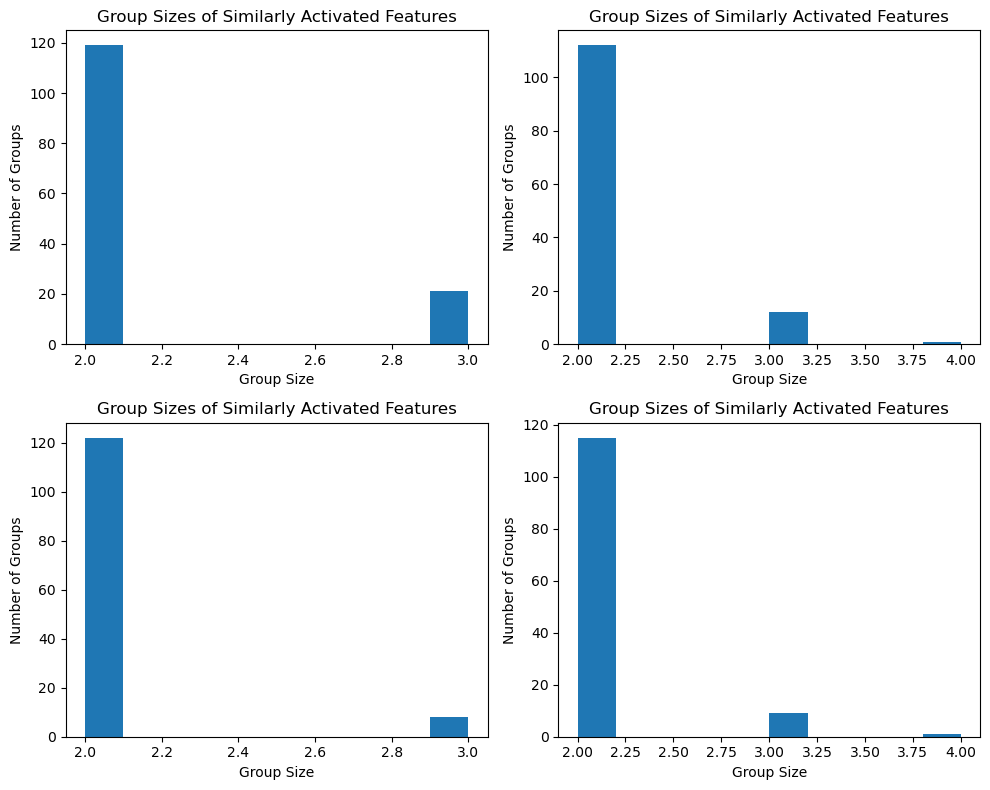

In [21]:
lengths_of_groups = [ [ len(res_sets[i][j]) for j in range(len(res_sets[i])) ] for i in range(len(layers)) ]

# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, len(layers)//2, figsize=(10, 8))  # 2x2 grid, adjust figsize as needed

# Flatten the array of axes for easy iteration
axs = axs.flatten()

for i in range(len(layers)):
    axs[i].hist(lengths_of_groups[i])
    axs[i].set_xlabel("Group Size")
    axs[i].set_ylabel("Number of Groups")
    axs[i].set_title("Group Sizes of Similarly Activated Features")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
def flatten_list(nested_list):
    flattened = []
    for item in nested_list:
        if isinstance(item, list):
            flattened.extend(flatten_list(item))
        else:
            flattened.append(item)
    return flattened

flattened = [ flatten_list(res_sets[i]) for i in range(len(layers)) ]

In [23]:
len(flattened[0])

301

[979, 331]
[815, 738, 712, 624, 782, 196, 498]
[914, 205]
[611, 356]


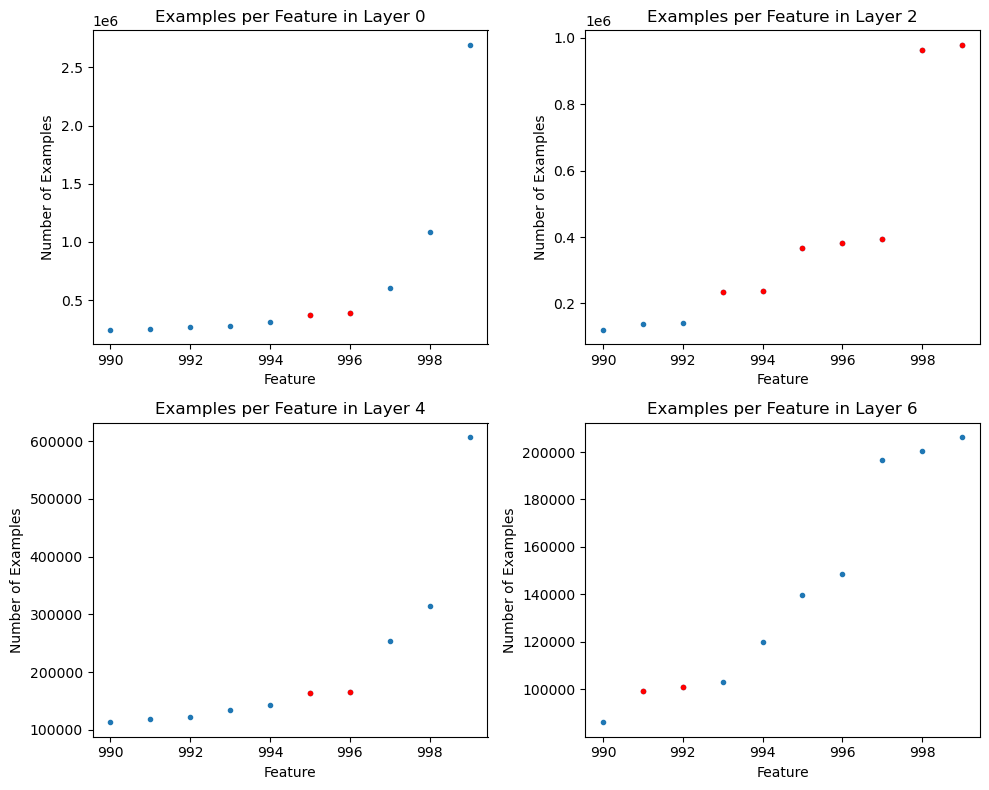

In [24]:
x_min = min(min(xi) for xi in x)
x_max = max(max(xi) for xi in x)
y_min = min(min(yi) for yi in y)
y_max = max(max(yi) for yi in y)

# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, len(layers)//2, figsize=(10, 8))  # 2x2 grid, adjust figsize as needed

# Flatten the array of axes for easy iteration
axs = axs.flatten()

for i in range(len(layers)):
    axs[i].scatter(x[i][990:], y[i][sorted_indices[i]][990:], marker='.')

    similar_xs = [ guy for guy in range(990, 1000) if sorted_indices_inv[i][guy] in flattened[i] ]
    similar_ys = y[i][sorted_indices[i]][similar_xs]

    print([ sorted_indices_inv[i][guy] for guy in similar_xs ])

    axs[i].scatter(similar_xs, similar_ys, marker='.', color='red')
    axs[i].set_xlabel('Feature')
    axs[i].set_ylabel('Number of Examples')
    axs[i].set_title('Examples per Feature in Layer ' + str(layers[i]))

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [25]:
structures.DisjointSet.intersect(res[1], res[2]).get_sets()

[[81, 867]]

In [26]:
top_30_by_activation = [ [ j for j in sorted_indices[i][-30:] ] for i in range(len(layers)) ]

### Plot of Tokens per Feature

In [27]:
y = [ [ set() for _ in range(feature_count) ] for _ in range(len(layers)) ] # start counts at 0
y_counts = np.array([ [ 0 for _ in range(feature_count) ] for _ in range(len(layers)) ])

for i in range(len(layers)):
    for j in range(len(feature_ids[i])):
        y[i][feature_ids[i][j]].add(token_ids[i][j]) # add one to count if example corresponds to that feature id

for i in range(len(layers)):
    for j in range(feature_count):
        y_counts[i][j] = len(y[i][j])

In [28]:
sorted_indices = [ list(range(feature_count)) for _ in range(len(layers)) ]
sorted_indices_inv = [ list(range(feature_count)) for _ in range(len(layers)) ]
for i in range(len(layers)):
    sorted_indices[i].sort(key=lambda k : y_counts[i][k])
for i in range(len(layers)):
    for j in range(feature_count):
        sorted_indices_inv[i][sorted_indices[i][j]] = j
sorted_indices_inv[0]

[187,
 188,
 189,
 138,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 99,
 198,
 199,
 200,
 201,
 0,
 63,
 202,
 203,
 204,
 23,
 205,
 206,
 207,
 208,
 209,
 139,
 140,
 100,
 210,
 211,
 212,
 213,
 214,
 215,
 18,
 141,
 65,
 118,
 216,
 217,
 218,
 219,
 220,
 25,
 221,
 64,
 222,
 223,
 224,
 101,
 225,
 226,
 227,
 228,
 229,
 36,
 230,
 231,
 232,
 233,
 20,
 234,
 235,
 37,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 102,
 246,
 247,
 248,
 249,
 250,
 251,
 89,
 252,
 253,
 254,
 119,
 255,
 256,
 257,
 258,
 259,
 83,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 109,
 8,
 269,
 270,
 142,
 271,
 272,
 98,
 273,
 274,
 275,
 276,
 277,
 278,
 26,
 279,
 84,
 280,
 281,
 143,
 282,
 283,
 284,
 1,
 144,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 296,
 297,
 90,
 298,
 299,
 300,
 301,
 302,
 303,
 304,
 305,
 42,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 22,
 313,
 314,
 315,
 70,
 316,
 317,
 145,
 318,
 319,
 95,
 320,


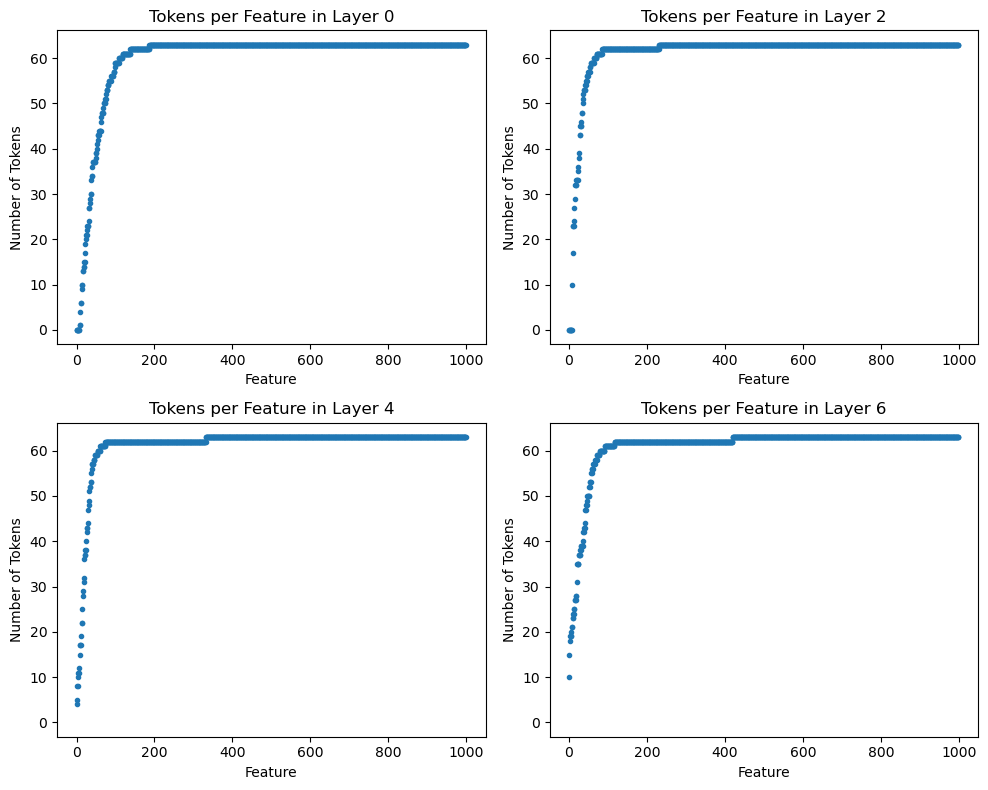

In [29]:
y_min = min(min(yi) for yi in y_counts)
y_max = max(max(yi) for yi in y_counts)

# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, len(layers)//2, figsize=(10, 8))  # 2x2 grid, adjust figsize as needed

# Flatten the array of axes for easy iteration
axs = axs.flatten()

for i in range(len(layers)):
    axs[i].scatter(range(feature_count), y_counts[i][sorted_indices[i]], marker='.')
    axs[i].set_xlabel('Feature')
    axs[i].set_ylabel('Number of Tokens')
    axs[i].set_title('Tokens per Feature in Layer ' + str(layers[i]))
    axs[i].set_xlim(-50, feature_count+50)  # Set x limits for all subplots
    axs[i].set_ylim(y_min-0.05*y_max, y_max+0.05*y_max)  # Set y limits for all subplots

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [30]:
features_under_30 = [ [ j for j in sorted_indices[i] if y_counts[i][j] <= 30 ] for i in range(len(layers)) ]

print(features_under_30[0])

[17, 127, 405, 462, 480, 511, 773, 905, 105, 765, 254, 358, 389, 871, 331, 588, 189, 542, 37, 496, 63, 959, 159, 22, 295, 46, 118, 433, 372, 784, 937, 767, 563, 867, 598, 708, 58, 66]


In [31]:
top_30_by_activation[0]

[464,
 497,
 817,
 477,
 593,
 607,
 129,
 174,
 29,
 995,
 939,
 990,
 516,
 109,
 496,
 889,
 288,
 228,
 449,
 841,
 783,
 697,
 676,
 909,
 487,
 586,
 867,
 123,
 729,
 674]

In [32]:
[ i for i in range(1000) if i in top_30_by_activation[0] and i in features_under_30[0] ]

[496, 867]

### Plot of Activations per Feature

In [33]:
x = range(feature_count) # indices of the features
y = [ set() for _ in range(feature_count) ] # start counts at 0

for i in range(len(feature_ids)):
    y[feature_ids[i]].add(activations[i]) # add one to count if example corresponds to that feature id

for i in range(feature_count):
    y[i] = len(y[i])

y.sort()

TypeError: only integer scalar arrays can be converted to a scalar index

Text(0.5, 1.0, 'Activations per Feature')

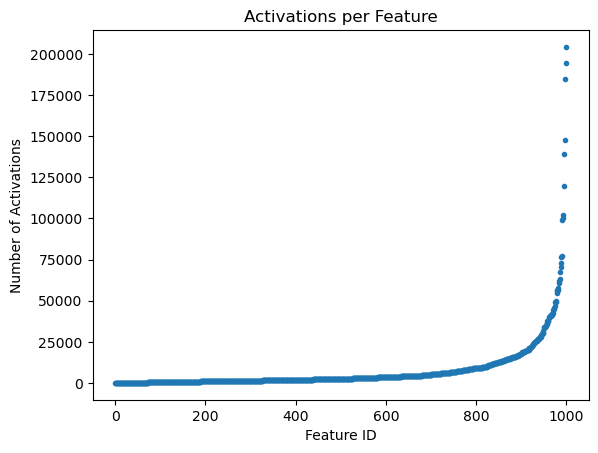

In [ ]:
plt.scatter(x, y, marker='.')
plt.xlabel('Feature ID')
plt.ylabel('Number of Activations')
plt.title('Activations per Feature')

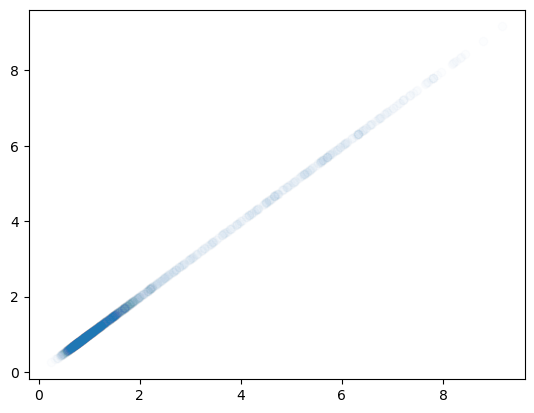

In [ ]:
feature_id = 424

y = [ activations[i] for i in range(n_examples) if feature_ids[i] == feature_id ]
plt.scatter(y, y, alpha=0.01)

### Plot of Batch Numbers per Feature

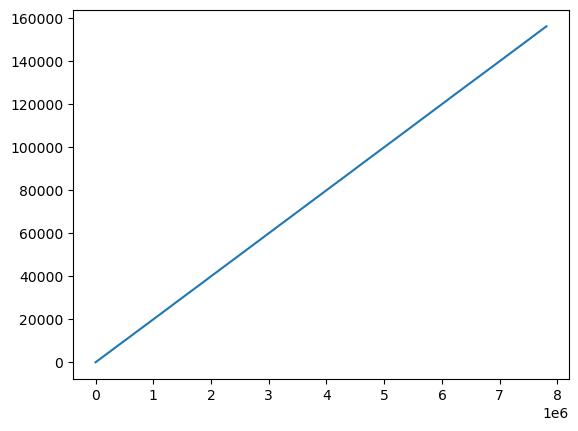

In [ ]:
plt.plot(batch_numbers)